### Importing Libraries for our code

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mplt # we only need pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from pylab import plt
import math
# set the default Seaborn style for graphics
sb.set() 

### Importing the data

In [2]:
ufc_new = pd.read_csv("ufc_master_STABLE.csv")
ufc_new.head()


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Curtis Blaydes,Chris Daukaus,-550.0,400,18.181818,400.000000,2022-03-26,"Columbus, Ohio, USA",USA,Red,...,Punch,2.0,0:17,317.0,260.0,1300.0,800.0,1500.0,-125.0,430.0
1,Joanne Wood,Alexa Grasso,230.0,-280,230.000000,35.714286,2022-03-26,"Columbus, Ohio, USA",USA,Blue,...,Rear Naked Choke,1.0,3:57,237.0,340.0,-140.0,1000.0,800.0,900.0,650.0
2,Matt Brown,Bryan Barberena,-105.0,-115,95.238095,86.956522,2022-03-26,"Columbus, Ohio, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,260.0,1200.0,800.0,160.0,300.0
3,Askar Askarov,Kai Kara-France,-440.0,340,22.727273,340.000000,2022-03-26,"Columbus, Ohio, USA",USA,Blue,...,NaN,3.0,5:00,900.0,-120.0,550.0,300.0,2200.0,700.0,550.0
4,Neil Magny,Max Griffin,-260.0,210,38.461538,210.000000,2022-03-26,"Columbus, Ohio, USA",USA,Red,...,NaN,3.0,5:00,900.0,-120.0,400.0,750.0,1400.0,500.0,500.0


### Distinguish datasets by relevant characteristics of the fighters

In [3]:
mycol = ['R_fighter',
 'B_fighter',
 'R_odds',
 'B_odds','Winner','weight_class',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_pct',
 'B_Weight_lbs',
 'R_avg_SIG_STR_pct',
 'R_avg_SUB_ATT',
 'R_avg_TD_pct',
 'R_Weight_lbs','R_age',
 'B_age',
 'lose_streak_dif',
 'win_streak_dif',
 'longest_win_streak_dif',
 'win_dif',
 'loss_dif',
 'age_dif','better_rank','R_wins','R_draw','R_losses','B_wins','B_draw','B_losses',
]

### Information on Dataset Columns

>R_fighter (String) - Gives us the Red Fighter Name

>B_fighter (String) - Gives us the Blue Fighter Name

>R_odds  (Numerical Value) - Red Odds (Money line)


>B_odds (Numerical Value) - Blue Odds (Money line)

>Winner (Categorical Value) - Gives us the winner, either Red or Blue 

>Weight Class (Categorical Value) - Gives us the weight class of both fighters

>B_avg_SIG_STR_Pct (Numerical Value) - Gives us the blue Significant Striking Accuracy in percentage

>B_avg_SUB_ATT (Numerical Value) - Gives us the Blue Average Submissions Attempted per 15 Minutes

>B_avg_TD_pct (Numerical Value) - Gives us the Blue Takedown Accuracy in percentage

>B_Weight_lbs (Numerical Value) - Gives us the Blue weight in lbs

>B_age (Numerical Value) - Gives us the Blue age

>R_avg_SIG_STR_Pct (Numerical Value) - Gives us the Red Significant Striking Accuracy in percentage

>R_avg_SUB_ATT (Numerical Value) - Gives us the Red Average Submissions Attempted per 15 Minutes

>R_avg_TD_pct (Numerical Value) - Gives us the Red Takedown Accuracy in percentage

>R_Weight_lbs (Numerical Value) - Gives us the Red weight in lbs

>R_age (Numerical Value) - Gives us the Red age


>Lose_streak_dif (Numerical Value) - Gives us the difference in their current lose streak: Blue’s Win Streak - Red’s Win Streak

>Win_streak_dif (Numerical Value) - Gives us the difference in their current win streak: Blue’s Win Streak - Red’s Win Streak

>Longest_win_streak_dif ( Numerical Value ) - Gives us the difference in the duration of their longest win streak: Blue’s Longest Win Streak - Red’s Longest Win Streak

>Win_dif ( Numerical Value ) - Gives us the difference in the number of wins throughout the fighters’ careers: Blue’s Wins- Red’s Wins

>Loss_dif ( Numerical Value ) - Gives us the difference in the number of losses : Blue’s Losses- Red’s Losses

>Height_dif ( Numerical Value ) - Gives us the difference in the height: Blue’s height- Red’s height

>Reach_dif ( Numerical Value ) - Gives us the difference in the reach: Blue’s reach - Red’s reach

>Age_dif ( Numerical Value ) - Gives us the difference in the age: Blue’s age - Red’s age

>Better rank (Categorical Value) - Gives us an indication of which fighter has a better ranking


### We check our dataset first to find out the possible outcomes for the winner column.

In [4]:
cleandataset = pd.DataFrame(ufc_new[mycol])
print((cleandataset["Winner"].unique()))

['Red' 'Blue']


### Cleaning the Dataset
We chose to focus on lightweight dataset set first. We also clean our dataset by removing all NaN rows.



In [5]:
lightweightdata = cleandataset[cleandataset["weight_class"]=="Lightweight"]

In [6]:
lightweightdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 5 to 5135
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               886 non-null    object 
 1   B_fighter               886 non-null    object 
 2   R_odds                  886 non-null    float64
 3   B_odds                  886 non-null    int64  
 4   Winner                  886 non-null    object 
 5   weight_class            886 non-null    object 
 6   B_avg_SIG_STR_pct       745 non-null    float64
 7   B_avg_SUB_ATT           733 non-null    float64
 8   B_avg_TD_pct            732 non-null    float64
 9   B_Weight_lbs            886 non-null    int64  
 10  R_avg_SIG_STR_pct       827 non-null    float64
 11  R_avg_SUB_ATT           827 non-null    float64
 12  R_avg_TD_pct            826 non-null    float64
 13  R_Weight_lbs            886 non-null    int64  
 14  R_age                   886 non-null    i

In [7]:
for x in mycol:
    lightweightdata = lightweightdata[lightweightdata[x].isnull()==False]

lightweightdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 5 to 5133
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               717 non-null    object 
 1   B_fighter               717 non-null    object 
 2   R_odds                  717 non-null    float64
 3   B_odds                  717 non-null    int64  
 4   Winner                  717 non-null    object 
 5   weight_class            717 non-null    object 
 6   B_avg_SIG_STR_pct       717 non-null    float64
 7   B_avg_SUB_ATT           717 non-null    float64
 8   B_avg_TD_pct            717 non-null    float64
 9   B_Weight_lbs            717 non-null    int64  
 10  R_avg_SIG_STR_pct       717 non-null    float64
 11  R_avg_SUB_ATT           717 non-null    float64
 12  R_avg_TD_pct            717 non-null    float64
 13  R_Weight_lbs            717 non-null    int64  
 14  R_age                   717 non-null    i

### Creating New Function
Since better rank is a categorical variable, to able to use it in our binary classification and logistic regression model, we had to encode values to it so 0 will be used to represent “neither”, 1 will be used to represent “blue” and -1 will be used to represent “red”.

In [8]:
def myfunc(myStr):
    if myStr=="neither":
        return 0
    elif myStr=="Red":
        return -1
    else:
        return 1
    

lightweightdata['better_rank'] = lightweightdata['better_rank'].apply(myfunc)

### Creating new predictor variables
The current columns available to us are specific to each side (e.g red,blue) but for our prediction of outcome, it will be more useful to have variables that reflected the differences between the fighters so we created additional columns for the comparisons using the columns provided to us by the dataset.


In [9]:
#creating pct dif n weight dif  'B_avg_SUB_ATT','B_avg_TD_pct'
lightweightdata["weight_dif"] = lightweightdata['B_Weight_lbs']-lightweightdata['R_Weight_lbs']
lightweightdata["avg_SIG_STR_dif"] = lightweightdata['B_avg_SIG_STR_pct']-lightweightdata['R_avg_SIG_STR_pct']
lightweightdata["avg_TD_dif"] = lightweightdata['B_avg_TD_pct']-lightweightdata['R_avg_TD_pct']
lightweightdata["avg_SUB_ATT_dif"] = lightweightdata['B_avg_SUB_ATT']-lightweightdata['R_avg_SUB_ATT']
lightweightdata["R_win_pct"] = lightweightdata["R_wins"]*100/(lightweightdata["R_wins"]+lightweightdata["R_draw"]+lightweightdata["R_losses"])
lightweightdata["B_win_pct"] = lightweightdata["B_wins"]*100/(lightweightdata["B_wins"]+lightweightdata["B_draw"]+lightweightdata["B_losses"])
lightweightdata["win_pct_dif"] = lightweightdata["B_win_pct"]-lightweightdata["R_win_pct"]
lightweightdata.head(20)

,R_fighter,B_fighter,R_odds,B_odds,Winner,weight_class,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_pct,B_Weight_lbs,...,B_wins,B_draw,B_losses,weight_dif,avg_SIG_STR_dif,avg_TD_dif,avg_SUB_ATT_dif,R_win_pct,B_win_pct,win_pct_dif
5,Marc Diakiese,Viacheslav Borshchev,120.0,-140,Red,Lightweight,0.63,0.0,0.00,155,...,2,0,0,0,0.24,-0.42,0.0,50.000000,100.000000,50.000000
14,Paddy Pimblett,Kazula Vargas,-625.0,450,Red,Lightweight,0.53,0.4,0.25,155,...,1,0,2,0,-0.04,0.00,-1.4,100.000000,33.333333,-66.666667
17,Jai Herbert,Ilia Topuria,450.0,-625,Blue,Lightweight,0.48,2.6,0.46,155,...,3,0,0,0,0.12,0.46,2.6,33.333333,100.000000,66.666667
28,Drew Dober,Terrance McKinney,-155.0,130,Red,Lightweight,0.59,1.2,0.44,155,...,2,0,1,0,0.19,0.27,1.1,58.823529,66.666667,7.843137
43,Jalin Turner,Jamie Mullarkey,-160.0,135,Red,Lightweight,0.43,0.3,0.32,155,...,2,0,2,0,-0.04,-0.48,-1.4,71.428571,50.000000,-21.428571
49,Devonte Smith,Ludovit Klein,-150.0,125,Blue,Lightweight,0.55,0.0,0.36,155,...,1,0,2,0,0.02,0.11,-0.3,66.666667,33.333333,-33.333333
54,Arman Tsarukyan,Joel Alvarez,-260.0,215,Red,Lightweight,0.44,1.2,0.00,155,...,4,0,1,0,-0.04,-0.37,1.2,80.000000,80.000000,0.000000
56,Rong Zhu,Ignacio Bahamondes,175.0,-210,Blue,Lightweight,0.47,0.6,0.00,155,...,2,0,1,0,0.00,-0.62,0.6,50.000000,66.666667,16.666667
58,Terrance McKinney,Fares Ziam,-105.0,-115,Red,Lightweight,0.40,0.0,0.11,155,...,2,0,1,0,-0.20,-0.22,-1.6,50.000000,66.666667,16.666667
65,Jim Miller,Nikolas Motta,150.0,-175,Red,Lightweight,0.30,0.0,0.00,155,...,1,0,0,0,-0.11,-0.43,-1.8,59.459459,100.000000,40.540541


In [10]:
lightweightdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 5 to 5133
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               717 non-null    object 
 1   B_fighter               717 non-null    object 
 2   R_odds                  717 non-null    float64
 3   B_odds                  717 non-null    int64  
 4   Winner                  717 non-null    object 
 5   weight_class            717 non-null    object 
 6   B_avg_SIG_STR_pct       717 non-null    float64
 7   B_avg_SUB_ATT           717 non-null    float64
 8   B_avg_TD_pct            717 non-null    float64
 9   B_Weight_lbs            717 non-null    int64  
 10  R_avg_SIG_STR_pct       717 non-null    float64
 11  R_avg_SUB_ATT           717 non-null    float64
 12  R_avg_TD_pct            717 non-null    float64
 13  R_Weight_lbs            717 non-null    int64  
 14  R_age                   717 non-null    i

### Further Cleaning of Dataset

We experienced zero division error when computing the win percentages for debuting fighters with a clean record, so we had to do .fillna() to resolve this problem.

In [11]:
lightweightdata["B_win_pct"].fillna(value = 0, inplace = True)
lightweightdata["R_win_pct"].fillna(value = 0, inplace = True)
lightweightdata["win_pct_dif"].fillna(value = 0, inplace = True)

In [12]:
lightweightdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 5 to 5133
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               717 non-null    object 
 1   B_fighter               717 non-null    object 
 2   R_odds                  717 non-null    float64
 3   B_odds                  717 non-null    int64  
 4   Winner                  717 non-null    object 
 5   weight_class            717 non-null    object 
 6   B_avg_SIG_STR_pct       717 non-null    float64
 7   B_avg_SUB_ATT           717 non-null    float64
 8   B_avg_TD_pct            717 non-null    float64
 9   B_Weight_lbs            717 non-null    int64  
 10  R_avg_SIG_STR_pct       717 non-null    float64
 11  R_avg_SUB_ATT           717 non-null    float64
 12  R_avg_TD_pct            717 non-null    float64
 13  R_Weight_lbs            717 non-null    int64  
 14  R_age                   717 non-null    i

### Generating Train - Test Split

We then chose the variables that we believed play the most part in predicting the outcome of the match and we split our dataset into test and train set. We split our dataset into 75% train data and 25% test data,as well as fixing the randomness of the split to ensure consistency in the results obtained.
 

In [13]:
# Extract Response and Predictors
y = lightweightdata["Winner"]
X = lightweightdata[['lose_streak_dif',
 'win_streak_dif',
 'longest_win_streak_dif',
 'win_dif',
 'loss_dif',
 'age_dif','better_rank','R_odds',
 'B_odds',"weight_dif","avg_SIG_STR_dif","avg_TD_dif","avg_SUB_ATT_dif"]]

    
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (537,) (537, 13)
Test Set  : (180,) (180, 13)


In [14]:
X_test

,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,age_dif,better_rank,R_odds,B_odds,weight_dif,avg_SIG_STR_dif,avg_TD_dif,avg_SUB_ATT_dif
2125,1,1,1,-6,0,-2,-1,-110.0,-110,15,-0.027778,-0.153333,-0.277778
2410,0,0,1,-4,2,4,-1,-160.0,140,0,0.026250,0.062250,0.437500
3384,3,0,-2,-3,4,6,0,155.0,-165,0,-0.023750,0.096250,1.125000
953,0,1,1,6,4,4,-1,100.0,-120,0,-0.010000,-0.130000,0.100000
3877,0,0,-2,-3,1,7,0,-155.0,145,0,-0.084000,0.670000,-0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,1,1,-2,-9,6,-5,0,-130.0,120,0,0.447500,-0.578750,-0.750000
2988,0,2,2,1,0,12,0,475.0,-650,15,0.010000,0.153000,0.700000
879,0,-6,-5,-6,0,-11,0,-177.0,145,0,-0.410000,-0.250000,-0.400000
1023,0,0,0,-3,3,-4,0,-430.0,345,0,-0.030000,-0.170000,-0.100000


In [15]:
y_train.value_counts()

Red     306
Blue    231
Name: Winner, dtype: int64

# Training Our Machine Learning Model

### Binary Classification Model

We used binary classification to help us get a predicted outcome since our outcome is a categorical value. Binary classification is capable of returning probability and predicted outcome which we used in our Kelly Criterion computations.

In [16]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=3)

[Text(1674.0, 951.3000000000001, 'B_odds <= 137.5\ngini = 0.49\nsamples = 537\nvalue = [231, 306]\nclass = Red'),
 Text(837.0, 679.5, 'B_odds <= -141.0\ngini = 0.486\nsamples = 282\nvalue = [165, 117]\nclass = Blue'),
 Text(418.5, 407.70000000000005, 'avg_SIG_STR_dif <= 0.171\ngini = 0.437\nsamples = 152\nvalue = [103, 49]\nclass = Blue'),
 Text(209.25, 135.89999999999998, 'gini = 0.406\nsamples = 134\nvalue = [96, 38]\nclass = Blue'),
 Text(627.75, 135.89999999999998, 'gini = 0.475\nsamples = 18\nvalue = [7, 11]\nclass = Red'),
 Text(1255.5, 407.70000000000005, 'avg_SIG_STR_dif <= -0.01\ngini = 0.499\nsamples = 130\nvalue = [62, 68]\nclass = Red'),
 Text(1046.25, 135.89999999999998, 'gini = 0.414\nsamples = 65\nvalue = [19, 46]\nclass = Red'),
 Text(1464.75, 135.89999999999998, 'gini = 0.448\nsamples = 65\nvalue = [43, 22]\nclass = Blue'),
 Text(2511.0, 679.5, 'R_odds <= -262.5\ngini = 0.384\nsamples = 255\nvalue = [66, 189]\nclass = Red'),
 Text(2092.5, 407.70000000000005, 'avg_SIG_S

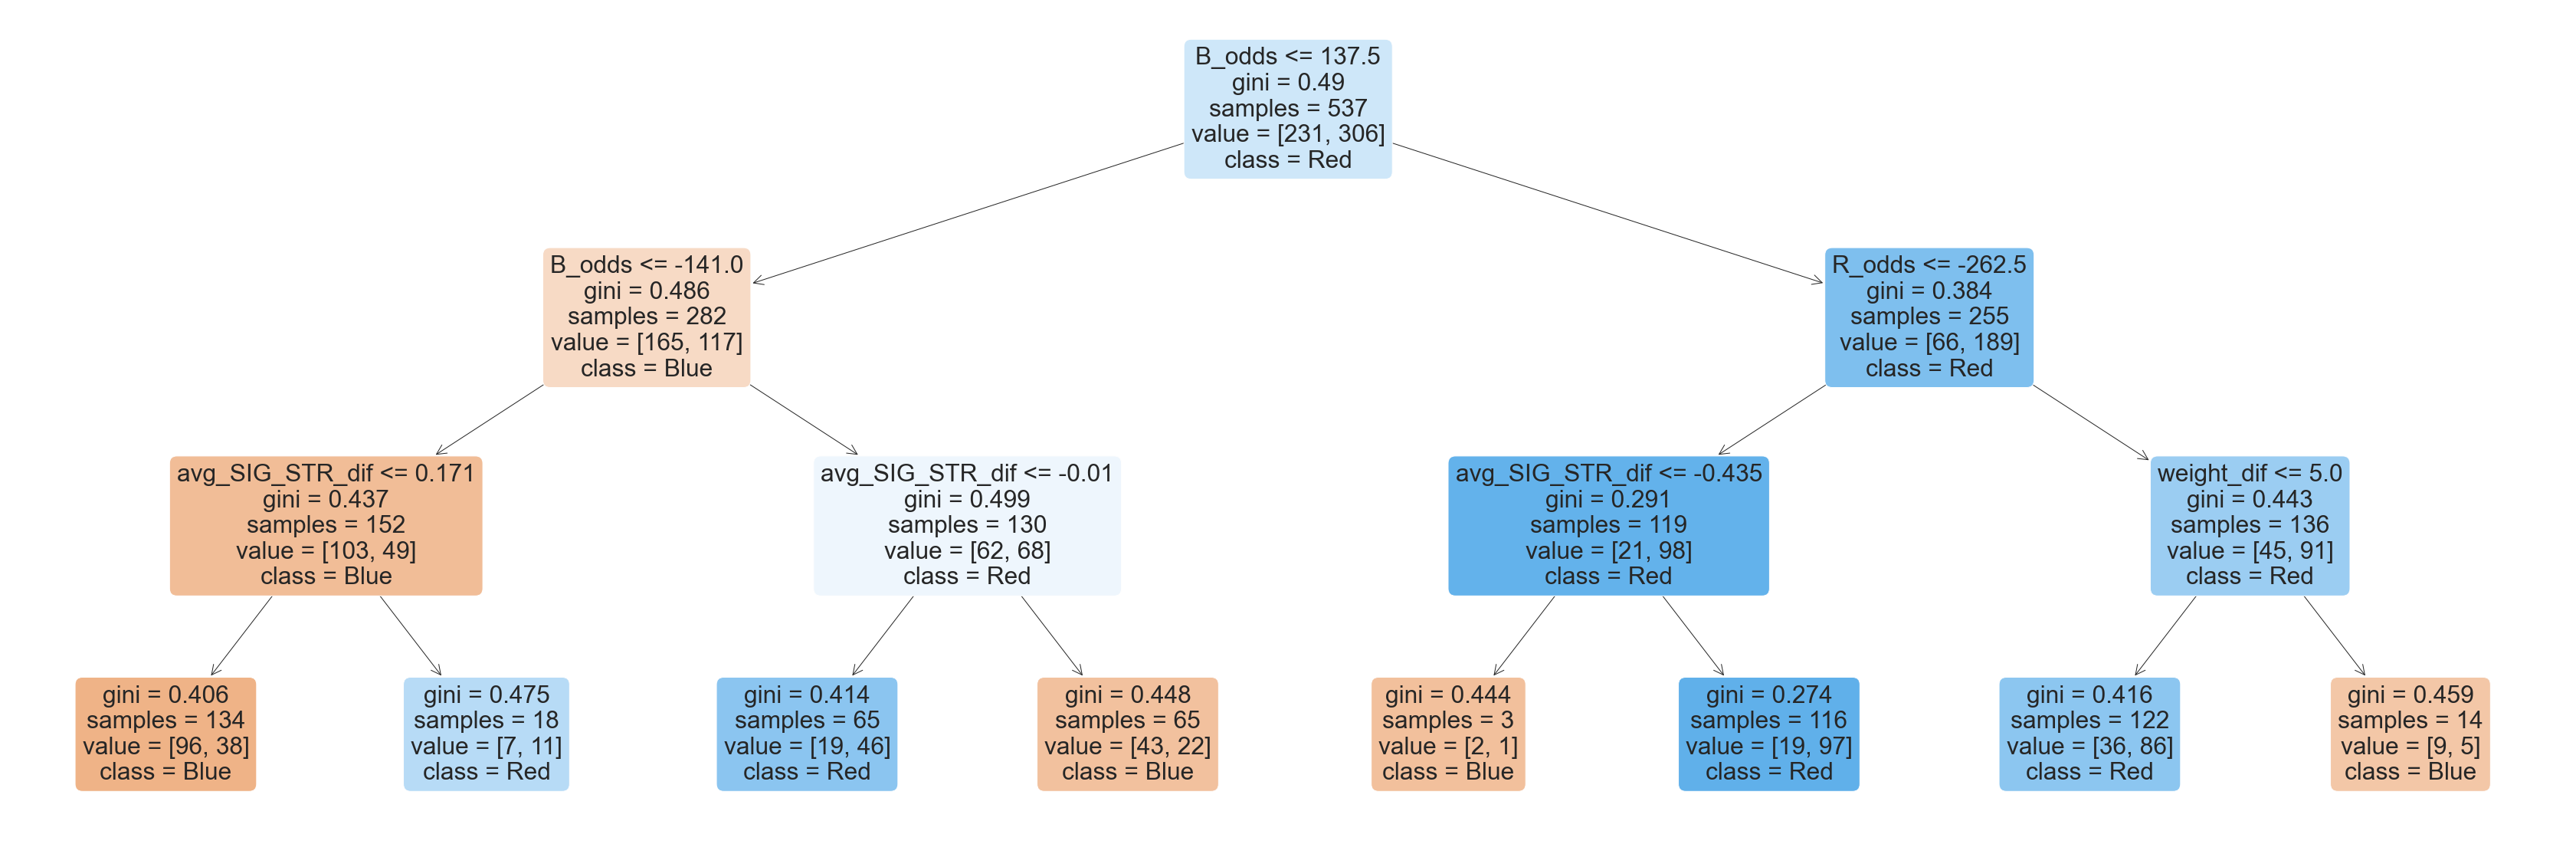

In [17]:

f = mplt.figure(figsize=(60,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Blue","Red"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7262569832402235

FP Rate & FN Rate 	Train Dataset
False Positive Rate:	35.06%
False Negative Rate:	21.57%

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6611111111111111

FP Rate & FN Rate 	Test Dataset
False Positive Rate:	39.47%
False Negative Rate:	29.81%



<AxesSubplot:>

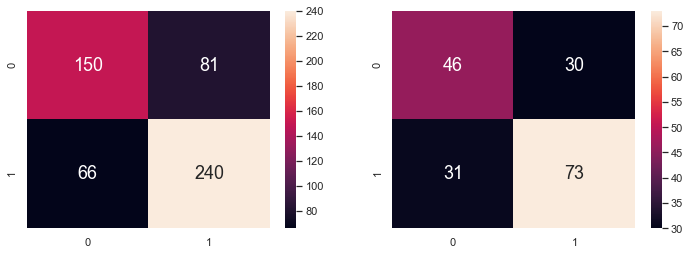

In [18]:
# Predict Legendary values corresponding to Total

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()
# Plot the Confusion Matrix for Train and Test
train = confusion_matrix(y_train,y_train_pred)
TN = train[0][0]
FN = train[1][0]
TP = train[1][1]
FP = train[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTrain Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
test = confusion_matrix(y_test, y_test_pred)
TN = test[0][0]
FN = test[1][0]
TP = test[1][1]
FP = test[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTest Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()

# Plot the Confusion Matrix for Train and Test
f, axes = mplt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [19]:
list(y_test)

['Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Blue',
 'Blue',
 'Blue',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Blue',
 'Blue',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Blue',
 'Blue',
 'Blue',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Blue',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blu

In [20]:
lightweight_len = len(y_test)

In [21]:
odds_tuple_list = []
for x in range(lightweight_len):
    mytuple = (X_test.iloc[x]["R_odds"],X_test.iloc[x]["B_odds"])
    odds_tuple_list.append(mytuple)

### Getting Decimal Odds for Easier Computation

We are given money-line odds and we are converting it to decimal odds since it will be easier to calculate the profits for our betting strategy.

In [22]:
red_decimal_odds_list = []
blue_decimal_odds_list = []
for i in odds_tuple_list:
    red,blue=i
    if red>0:
        red=((red/100)+1).round(3)
    elif red<0:
        red=((100/red)+1).round(3)
    
    if blue>0:
        blue=((blue/100)+1).round(3)
    elif blue<0:
        blue=((100/blue)+1).round(3)
    red_decimal_odds_list.append(red)
    blue_decimal_odds_list.append(blue)

In [23]:
red_decimal_odds_list

[0.091,
 0.375,
 2.55,
 2.0,
 0.355,
 3.1,
 0.692,
 0.63,
 0.583,
 2.04,
 0.623,
 0.787,
 0.412,
 3.0,
 0.692,
 0.762,
 0.643,
 0.722,
 0.688,
 0.6,
 0.412,
 0.355,
 0.81,
 3.05,
 0.13,
 0.75,
 2.05,
 0.701,
 3.6,
 2.5,
 2.7,
 0.783,
 0.13,
 2.35,
 0.6,
 3.0,
 2.65,
 2.45,
 0.535,
 0.683,
 0.722,
 0.84,
 2.1,
 0.683,
 0.917,
 0.818,
 0.608,
 2.1,
 0.333,
 2.9,
 2.3,
 2.65,
 2.05,
 0.783,
 2.45,
 0.429,
 0.524,
 2.2,
 0.737,
 0.474,
 2.67,
 0.459,
 0.375,
 2.65,
 2.7,
 0.643,
 2.15,
 0.259,
 0.649,
 0.474,
 2.15,
 3.9,
 2.2,
 2.55,
 3.5,
 0.667,
 0.459,
 0.737,
 0.6,
 0.592,
 4.0,
 0.643,
 0.2,
 2.15,
 0.81,
 2.6,
 2.4,
 0.296,
 0.545,
 0.231,
 3.15,
 3.11,
 2.4,
 2.7,
 2.15,
 0.429,
 0.231,
 4.1,
 0.655,
 0.583,
 0.2,
 0.556,
 0.333,
 0.688,
 0.701,
 0.524,
 0.429,
 0.872,
 0.767,
 0.881,
 0.718,
 0.5,
 4.75,
 3.55,
 2.2,
 3.6,
 0.259,
 0.565,
 0.231,
 2.7,
 0.848,
 0.412,
 0.789,
 6.05,
 0.655,
 0.688,
 0.762,
 2.05,
 0.459,
 3.48,
 0.286,
 0.583,
 0.73,
 0.286,
 0.167,
 2.05,
 0.259,

### DataFrame of all the prediction information from Binary Classification Model
We consolidated all the prediction information which consists of the probability given to us by our model and then comparing the predicted outcome with the actual outcome.

In [24]:
y_prob = dectree.predict_proba(X_test)
y_prob = pd.DataFrame(y_prob[:,1], columns = ["Probability_Of_Red"], index = X_test.index)

Winner_df = pd.DataFrame(y_test,columns = ["Winner"],index = X_test.index)
Predicted_Winner_df = pd.DataFrame(y_test_pred,columns = ["Predicted_Winner"],index = X_test.index)
compare_prob = pd.concat([Winner_df,Predicted_Winner_df, y_prob], axis = 1)
compare_prob["Probability_Of_Blue"] = 1 - compare_prob["Probability_Of_Red"]
compare_prob["Red Decimal Odds"] = red_decimal_odds_list
compare_prob["Blue Decimal Odds"] = blue_decimal_odds_list


### Random betting strategy

To highlight the effectiveness of Kelly Criterion and our Machine Learning models in our decision making, We needed a basis for comparison, so we created a random betting stategy and illustrate the outcome.

In [25]:
import random
red = y_test.value_counts()["Red"]
blue = y_test.value_counts()["Blue"]
randomised_outcomes = []
random.seed(2)

for x in range(red):
    randomised_outcomes.append("Red")
    
for x in range(blue):
    randomised_outcomes.append("Blue")
    
random.shuffle(randomised_outcomes)

In [26]:
I =  len(y_test)


def random_simulation(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    
    for i in range(I):
        f = random.random()
        actual_outcome = compare_prob.iloc[i]["Winner"]
        red_deci_odds = compare_prob.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob.iloc[i]["Blue Decimal Odds"]
        choice = randomised_outcomes[i]

        if (choice==actual_outcome):
            if(choice=="Red"):
                c[0,i+1] = (f) * c[0,i] * red_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
        else:
            c[0,i+1] = (1-f) * c[0,i]          
    return c
        

In [27]:
random_simulation(100)
print(random_simulation(100))
print("\n")
print(f'Final Outcome: ${math.floor(random_simulation(100)[0][-1])}')


[[1.00000000e+02 1.04764517e+02 1.40386282e+02 7.49230905e+01
  6.16340711e+01 6.37002060e+01 3.80340118e+01 4.37329072e+01
  1.88371838e+01 1.15700686e+01 1.66564837e+01 2.67490277e+01
  3.49587732e+01 4.29916705e+01 8.52989483e+00 6.18920842e+00
  4.86551143e-01 2.04243130e-01 6.04399244e-01 8.58854347e-01
  8.51567568e-01 1.08968520e+00 5.64395669e-01 7.99120708e-01
  8.81231606e-01 2.53165717e-01 4.37796789e-01 1.05001427e-01
  1.30781016e-01 1.23356176e-02 1.48019681e-02 1.93478214e-02
  1.80816092e-02 4.00091967e-02 3.00330066e-03 4.66517631e-03
  2.52243435e-03 3.08942989e-04 6.57364465e-04 8.48861296e-06
  1.20454218e-05 7.85799660e-06 1.28720610e-05 7.91403203e-07
  1.79705341e-09 2.21775003e-09 3.35181430e-09 5.05027829e-09
  1.26816706e-08 1.19958529e-08 6.00413323e-09 1.97072476e-08
  5.49939692e-08 5.67081104e-08 4.06792893e-08 8.72615663e-08
  8.73296951e-08 8.43589793e-08 1.26509880e-08 1.79124544e-08
  1.96480419e-08 6.35776071e-09 3.18982891e-09 2.76435580e-09
  3.6679

### Plotting A Smooth Curve
We showed the how the capital varied with the number of games.

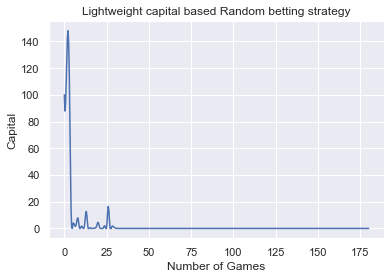

In [28]:
from scipy.interpolate import make_interp_spline
x_curve_plot = []
y_curve_plot = []


for i in range(0,lightweight_len+1):
    x_curve_plot.append(i)
    y_curve_plot.append(random_simulation(100)[0][i])
 
# Dataset
x = np.array(x_curve_plot)
y = np.array(y_curve_plot)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
for i in range(len(Y_)):
    if(Y_[i]<=0):
        Y_[i] = 0
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Lightweight capital based Random betting strategy")
plt.xlabel("Number of Games")
plt.ylabel("Capital")
plt.show()

### Binary Classification Model depth 3 with Kelly Criterion

#### Kelly Criterion
The Kelly criterion is a mathematical formula relating to the long-term growth of capital developed by John L. Kelly Jr. while working at AT&T's Bell Laboratories. It is used to determine how much to invest in a given asset, in order to maximize wealth growth over time. 

#### How Kelly Criterion is calculated:

### f* = p - q/b

 where:
  <br>
 f* is the fraction of the current asset to wager.
 <br>
 p is the probability of a win.
  <br>
 q is the probabality of a loss (q=1-p).
  <br>
 b is the proportion of the bet gained with a win.
  <br>

After attaining our binary classification model, we used Kelly Criterion as a guideline on how much to bet based on the probability given by us from the model.

In [29]:
predictions_binary = list(compare_prob["Predicted_Winner"])
probability_binary = []

for x in range(len(y_test)):
    to_append = [compare_prob.iloc[x]["Probability_Of_Blue"],compare_prob.iloc[x]["Probability_Of_Red"]]
    probability_binary.append(to_append)

In [30]:
I =  len(y_test)

def run_simulation_pure_kelly_criterion_binary(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    flag = 0
    for i in range(I): #Outer loop for the series simulations.
        red_proba = compare_prob.iloc[i]["Probability_Of_Red"]
        blue_proba = compare_prob.iloc[i]["Probability_Of_Blue"]
        red_deci_odds = compare_prob.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob.iloc[i]["Blue Decimal Odds"]
        prediction = compare_prob.iloc[i]["Predicted_Winner"]
        actual_outcome = compare_prob.iloc[i]["Winner"]

        if flag==1 : 
            c[0,i+1] = 0
            continue
            
        elif c[0,i]<=0:
            c[0,i+1] = 0
            flag = 1
            continue
        
        if prediction=='Red':
            f = (red_proba) - (blue_proba)/red_deci_odds 
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * red_deci_odds  + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
        else:
            f = (blue_proba) - (red_proba)/blue_deci_odds
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
            
        
    return c




c_1 = run_simulation_pure_kelly_criterion_binary(100) #Runs the simulation.
print(c_1)#Looking at a simulation
print("\n")
print(f'Final Outcome: ${math.floor(c_1[0][-1])}')

[[1.00000000e+02 1.00000000e+02 1.00000000e+02 1.00000000e+02
  1.00000000e+02 1.00000000e+02 1.15701493e+02 1.63701653e+02
  6.93738396e+01 7.74132440e+01 7.74132440e+01 1.05062452e+02
  4.23936210e+01 4.23936210e+01 4.69240437e+01 6.63910496e+01
  9.78203435e+01 1.34394189e+02 5.25015413e+01 7.41068308e+01
  8.35827862e+01 8.35827862e+01 8.35827862e+01 1.26505429e+02
  6.53265740e+01 6.53265740e+01 9.55964305e+01 4.15745827e+01
  5.91351847e+01 7.15129732e+01 7.15129732e+01 3.81108232e+01
  1.42145633e+01 2.86806151e+01 2.86806151e+01 3.23479724e+01
  3.58048602e+01 3.84768647e+01 3.84768647e+01 9.77037528e+01
  1.37502029e+02 1.97995809e+02 3.04640449e+02 3.04640449e+02
  1.22955112e+02 1.97098105e+02 2.99633297e+02 3.39636798e+02
  3.39636798e+02 7.41453255e+02 8.31312963e+02 8.31312963e+02
  7.33098773e+02 7.33098773e+02 1.09301867e+03 1.09301867e+03
  1.10102817e+03 1.18282915e+03 1.18282915e+03 1.71804914e+03
  1.78513755e+03 1.66201623e+03 1.70934282e+03 1.70934282e+03
  1.8050

### Plotting A Smooth Curve
We showed the how the capital varied with the number of games.

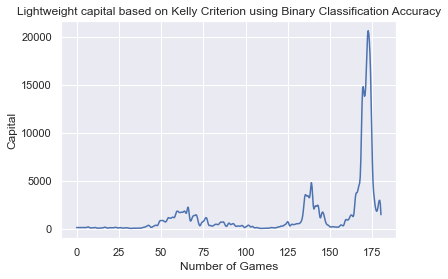

In [31]:
from scipy.interpolate import make_interp_spline
x_curve_plot = []
y_curve_plot = []



for i in range(0,lightweight_len + 1):
    x_curve_plot.append(i)
    y_curve_plot.append(run_simulation_pure_kelly_criterion_binary(100)[0][i])
 
# Dataset
x = np.array(x_curve_plot)
y = np.array(y_curve_plot)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
for i in range(len(Y_)):
    if(Y_[i]<=0):
        Y_[i] = 0
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Lightweight capital based on Kelly Criterion using Binary Classification Accuracy")
plt.xlabel("Number of Games")
plt.ylabel("Capital")
plt.show()

### Decision Tree depth 5 with Kelly Criterion

In [32]:
# Decision Tree using Train Data
dectree5 = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree5.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=5)

[Text(1798.659574468085, 996.6, 'B_odds <= 137.5\ngini = 0.49\nsamples = 537\nvalue = [231, 306]\nclass = Red'),
 Text(1015.0851063829787, 815.4000000000001, 'B_odds <= -141.0\ngini = 0.486\nsamples = 282\nvalue = [165, 117]\nclass = Blue'),
 Text(569.8723404255319, 634.2, 'avg_SIG_STR_dif <= 0.171\ngini = 0.437\nsamples = 152\nvalue = [103, 49]\nclass = Blue'),
 Text(284.93617021276594, 453.0, 'avg_TD_dif <= -0.061\ngini = 0.406\nsamples = 134\nvalue = [96, 38]\nclass = Blue'),
 Text(142.46808510638297, 271.79999999999995, 'age_dif <= 3.5\ngini = 0.491\nsamples = 51\nvalue = [29, 22]\nclass = Blue'),
 Text(71.23404255319149, 90.59999999999991, 'gini = 0.485\nsamples = 29\nvalue = [12, 17]\nclass = Red'),
 Text(213.70212765957444, 90.59999999999991, 'gini = 0.351\nsamples = 22\nvalue = [17, 5]\nclass = Blue'),
 Text(427.4042553191489, 271.79999999999995, 'weight_dif <= -12.5\ngini = 0.311\nsamples = 83\nvalue = [67, 16]\nclass = Blue'),
 Text(356.17021276595744, 90.59999999999991, 'gin

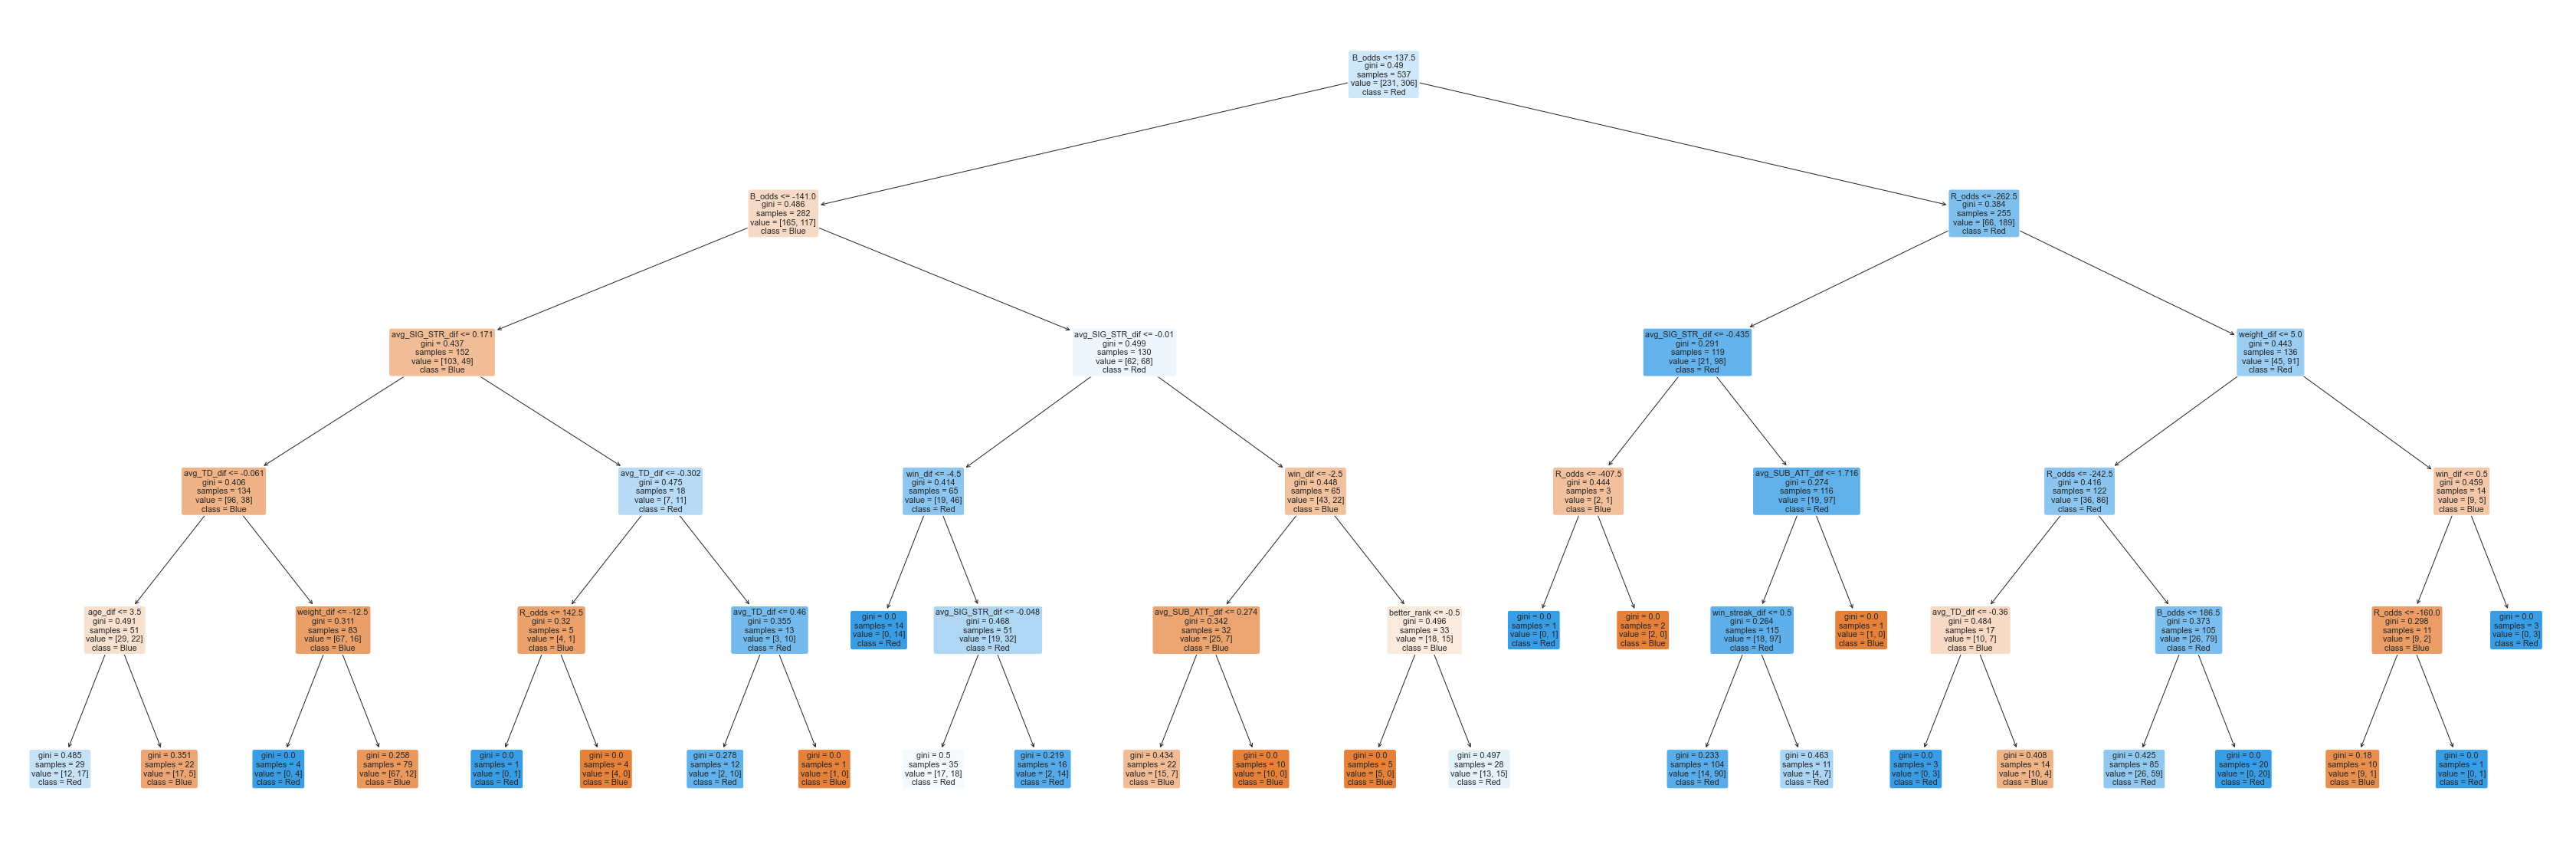

In [33]:
f = mplt.figure(figsize=(60,20))
plot_tree(dectree5, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Blue","Red"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7783985102420856

FP Rate & FN Rate 	Train Dataset
False Positive Rate:	38.96%
False Negative Rate:	9.48%

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6722222222222223

FP Rate & FN Rate 	Test Dataset
False Positive Rate:	50.00%
False Negative Rate:	20.19%



<AxesSubplot:>

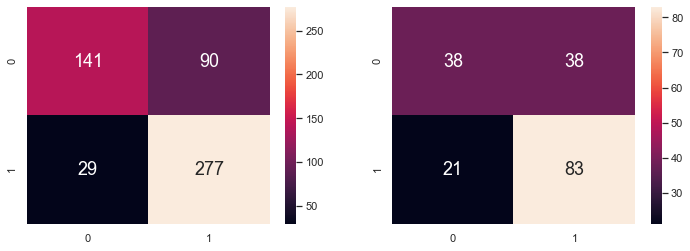

In [34]:
# Predict Legendary values corresponding to Total

y_train_pred = dectree5.predict(X_train)
y_test_pred = dectree5.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree5.score(X_train, y_train))
print()
# Plot the Confusion Matrix for Train and Test
train = confusion_matrix(y_train,y_train_pred)
TN = train[0][0]
FN = train[1][0]
TP = train[1][1]
FP = train[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTrain Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree5.score(X_test, y_test))
print()
test = confusion_matrix(y_test, y_test_pred)
TN = test[0][0]
FN = test[1][0]
TP = test[1][1]
FP = test[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTest Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()

# Plot the Confusion Matrix for Train and Test
f, axes = mplt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [35]:
y_prob = dectree5.predict_proba(X_test)
y_prob = pd.DataFrame(y_prob[:,1], columns = ["Probability_Of_Red"], index = X_test.index)

Winner_df = pd.DataFrame(y_test,columns = ["Winner"],index = X_test.index)
Predicted_Winner_df = pd.DataFrame(y_test_pred,columns = ["Predicted_Winner"],index = X_test.index)
compare_prob = pd.concat([Winner_df,Predicted_Winner_df, y_prob], axis = 1)
compare_prob["Probability_Of_Blue"] = 1 - compare_prob["Probability_Of_Red"]
compare_prob["Red Decimal Odds"] = red_decimal_odds_list
compare_prob["Blue Decimal Odds"] = blue_decimal_odds_list

In [36]:
predictions_binary = list(compare_prob["Predicted_Winner"])
probability_binary = []

for x in range(len(y_test)):
    to_append = [compare_prob.iloc[x]["Probability_Of_Blue"],compare_prob.iloc[x]["Probability_Of_Red"]]
    probability_binary.append(to_append)

In [37]:
I =  len(y_test)

def run_simulation_pure_kelly_criterion_binary(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    flag = 0
    for i in range(I): #Outer loop for the series simulations.
        red_proba = compare_prob.iloc[i]["Probability_Of_Red"]
        blue_proba = compare_prob.iloc[i]["Probability_Of_Blue"]
        red_deci_odds = compare_prob.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob.iloc[i]["Blue Decimal Odds"]
        prediction = compare_prob.iloc[i]["Predicted_Winner"]
        actual_outcome = compare_prob.iloc[i]["Winner"]

        if flag==1 : 
            c[0,i+1] = 0
            continue
            
        elif c[0,i]<=0:
            c[0,i+1] = 0
            flag = 1
            continue
        
        if prediction=='Red':
            f = (red_proba) - (blue_proba)/red_deci_odds 
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * red_deci_odds  + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
        else:
            f = (blue_proba) - (red_proba)/blue_deci_odds
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
            
        
    return c




c_1 = run_simulation_pure_kelly_criterion_binary(100) #Runs the simulation.
print(c_1)#Looking at a simulation
print("\n")
print(f'Final Outcome: ${math.floor(c_1[0][-1])}')

[[1.00000000e+02 1.09100000e+02 1.09100000e+02 5.86334511e+01
  6.84252375e+01 6.84252375e+01 9.37209218e+01 1.37229057e+02
  1.29110167e+02 2.04381394e+02 3.32849698e+02 3.43773220e+02
  6.14322744e+02 6.14322744e+02 3.38936687e+02 4.96281525e+02
  5.56466939e+02 5.81811479e+02 1.86798305e+02 2.72869217e+02
  1.01587674e+02 1.01587674e+02 1.01587674e+02 1.59121462e+02
  3.52154055e+01 3.52154055e+01 5.33310228e+01 3.85395614e+01
  5.67309755e+01 8.12157773e+01 9.47089049e+01 2.16310462e+01
  6.63073699e+00 6.63073699e+00 6.71211422e+00 2.53637496e+00
  3.32345385e+00 4.22793812e+00 2.27221451e+00 8.07772259e+00
  1.17647369e+01 1.75317205e+01 2.79158934e+01 4.63603229e+01
  1.53781666e+01 2.55114911e+01 4.01364441e+01 6.45394020e+01
  1.07181507e+02 1.07181507e+02 1.29616545e+02 2.50740972e+02
  1.18440055e+02 1.42128066e+02 2.19300873e+02 1.17858543e+02
  1.17858543e+02 1.79616419e+02 1.79616419e+02 2.69994566e+02
  2.76239381e+02 1.37760440e+02 1.39512429e+02 1.39512429e+02
  1.7440

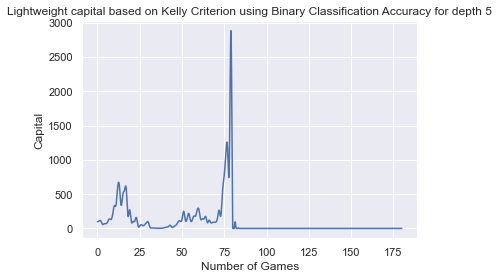

In [38]:
from scipy.interpolate import make_interp_spline
x_curve_plot = []
y_curve_plot = []



for i in range(0,lightweight_len + 1):
    x_curve_plot.append(i)
    check = run_simulation_pure_kelly_criterion_binary(100)[0][i]
    if check <=0:
        check = 0
    y_curve_plot.append(check)
 
# Dataset
x = np.array(x_curve_plot)
y = np.array(y_curve_plot)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 1000)
Y_ = X_Y_Spline(X_)
for i in range(len(Y_)):
    if(Y_[i]<=0):
        Y_[i] = 0
        
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Lightweight capital based on Kelly Criterion using Binary Classification Accuracy for depth 5")
plt.xlabel("Number of Games")
plt.ylabel("Capital")
plt.show()

### Finding overfitting points(GINI = 0, but wrong prediction)

In [39]:
compare_prob[78:81]

,Winner,Predicted_Winner,Probability_Of_Red,Probability_Of_Blue,Red Decimal Odds,Blue Decimal Odds
3199,Blue,Blue,0.285714,0.714286,0.600,3.100
1166,Blue,Red,1.000000,0.000000,0.592,3.050
2259,Blue,Blue,0.151899,0.848101,4.000,0.722


### Alternative Machine Learning Model - Logistic Regression 

We then calculated the classification accuracy, true postive rate and false positive rate for our decision tree model. We only need false positive rate for our case since we would not be betting for negatives. We have decided to compare Binary Classification with Logistic Regression to see if there is a more reliable model for our betting strategy. (i.e higher classification accuracy).

Accuracy =  0.6777777777777778
              precision    recall  f1-score   support

        Blue       0.63      0.58      0.60        76
         Red       0.71      0.75      0.73       104

    accuracy                           0.68       180
   macro avg       0.67      0.66      0.67       180
weighted avg       0.68      0.68      0.68       180

FP Rate & FN Rate 	Test Dataset
False Positive Rate:	42.11%
False Negative Rate:	25.00%



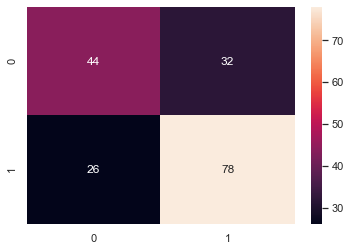

In [40]:
logmodel = LogisticRegression(max_iter = 3000)
lm = logmodel.fit(X_train,y_train)
predictions = lm.predict(X_test)
print("Accuracy = ",lm.score(X_test,y_test))
print(classification_report(y_test,predictions))
test = confusion_matrix(y_test,predictions)
TN = test[0][0]
FN = test[1][0]
TP = test[1][1]
FP = test[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTest Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()
hm = sb.heatmap(data = test,annot = True)
  
# displaying the plotted heatmap
plt.show()

In [41]:
probability = lm.predict_proba(X_test).round(3)
probability

array([[0.632, 0.368],
       [0.46 , 0.54 ],
       [0.683, 0.317],
       [0.616, 0.384],
       [0.393, 0.607],
       [0.665, 0.335],
       [0.285, 0.715],
       [0.349, 0.651],
       [0.291, 0.709],
       [0.606, 0.394],
       [0.386, 0.614],
       [0.149, 0.851],
       [0.348, 0.652],
       [0.646, 0.354],
       [0.263, 0.737],
       [0.168, 0.832],
       [0.222, 0.778],
       [0.431, 0.569],
       [0.191, 0.809],
       [0.277, 0.723],
       [0.493, 0.507],
       [0.446, 0.554],
       [0.179, 0.821],
       [0.577, 0.423],
       [0.568, 0.432],
       [0.215, 0.785],
       [0.684, 0.316],
       [0.328, 0.672],
       [0.726, 0.274],
       [0.604, 0.396],
       [0.604, 0.396],
       [0.173, 0.827],
       [0.408, 0.592],
       [0.51 , 0.49 ],
       [0.324, 0.676],
       [0.666, 0.334],
       [0.694, 0.306],
       [0.646, 0.354],
       [0.386, 0.614],
       [0.26 , 0.74 ],
       [0.258, 0.742],
       [0.165, 0.835],
       [0.632, 0.368],
       [0.2

### DataFrame of all the prediction information from logistic regression model
We consolidated all the prediction information which consists of the probability given to us by our model and then comparing the predicted outcome with the actual outcome.

In [42]:
y_prob_logistic = lm.predict_proba(X_test).round(3)
y_prob_logistic = pd.DataFrame(y_prob_logistic[:,1], columns = ["Probability_Of_Red"], index = X_test.index)
Winner_df_logistic = pd.DataFrame(y_test,columns = ["Winner"],index = X_test.index)
Predicted_Winner_logistic_df = pd.DataFrame(predictions,columns = ["Predicted_Winner"],index = X_test.index)
compare_prob_logistic = pd.concat([Winner_df,Predicted_Winner_logistic_df, y_prob_logistic], axis = 1)
compare_prob_logistic["Probability_Of_Blue"] = 1 - compare_prob_logistic["Probability_Of_Red"]
compare_prob_logistic["Red Decimal Odds"] = red_decimal_odds_list
compare_prob_logistic["Blue Decimal Odds"] = blue_decimal_odds_list
compare_prob_logistic


,Winner,Predicted_Winner,Probability_Of_Red,Probability_Of_Blue,Red Decimal Odds,Blue Decimal Odds
2125,Red,Blue,0.368,0.632,0.091,0.091
2410,Red,Red,0.540,0.460,0.375,2.400
3384,Red,Blue,0.317,0.683,2.550,0.394
953,Blue,Blue,0.384,0.616,2.000,0.167
3877,Red,Red,0.607,0.393,0.355,2.450
...,...,...,...,...,...,...
4372,Red,Red,0.644,0.356,0.231,2.200
2988,Red,Blue,0.071,0.929,5.750,0.846
879,Red,Red,0.769,0.231,0.435,2.450
1023,Red,Red,0.785,0.215,0.767,4.450


### Logistic Regression Model with Kelly Criterion
After attaining our logistic regression model, we used Kelly Criterion as a guideline on how much to bet based on the probability given by us from the model.

In [43]:
I =  len(y_test)

def run_simulation_pure_kelly_criterion_logistic(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    flag = 0
    for i in range(I): #Outer loop for the series simulations.
        red_proba = compare_prob_logistic.iloc[i]["Probability_Of_Red"]
        blue_proba = compare_prob_logistic.iloc[i]["Probability_Of_Blue"]
        red_deci_odds = compare_prob_logistic.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob_logistic.iloc[i]["Blue Decimal Odds"]
        prediction = compare_prob_logistic.iloc[i]["Predicted_Winner"]
        actual_outcome = compare_prob_logistic.iloc[i]["Winner"]
        
        if flag==1 : 
            c[0,i+1] = 0
            continue
            
        elif c[0,i]<=0:
            c[0,i+1] = 0
            flag = 1
            continue
        
        if prediction=='Red':
            f = (red_proba) - (blue_proba)/red_deci_odds 
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * red_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
        else:
            f = blue_proba - red_proba/blue_deci_odds
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
            
        
    return c


c_1 = run_simulation_pure_kelly_criterion_logistic(100) #Runs the simulation.
print(c_1)#Looking at a simulation
print("\n")
print(f'Final Outcome: ${math.floor(c_1[0][-1])}')

[[1.00000000e+02 1.00000000e+02 1.00000000e+02 1.00000000e+02
  1.00000000e+02 1.00000000e+02 1.07397500e+02 1.29927348e+02
  1.17320270e+02 1.31674053e+02 1.31674053e+02 1.31674053e+02
  2.00241605e+02 2.00241605e+02 2.00241605e+02 2.49702082e+02
  3.66059257e+02 4.67916710e+02 4.67916710e+02 6.38983315e+02
  7.39175899e+02 7.39175899e+02 7.39175899e+02 1.09842278e+03
  1.09842278e+03 1.09842278e+03 1.50895829e+03 1.50895829e+03
  1.72484797e+03 2.11378049e+03 2.11378049e+03 2.11378049e+03
  8.32713431e+02 8.32713431e+02 8.32713431e+02 9.00662847e+02
  9.26755050e+02 9.64752007e+02 9.64752007e+02 9.64752007e+02
  1.20152144e+03 1.53521279e+03 2.35870092e+03 2.35870092e+03
  1.26704717e+03 2.20303899e+03 3.23213578e+03 4.36051316e+03
  4.36051316e+03 4.36051316e+03 4.49714984e+03 4.49714984e+03
  4.48912328e+03 4.48912328e+03 6.56336759e+03 6.56336759e+03
  6.61223186e+03 6.61223186e+03 6.61223186e+03 8.83230855e+03
  8.83230855e+03 8.83230855e+03 1.05796836e+04 1.05796836e+04
  1.0635

### Plotting A Smooth Curve
We showed the how the capital varied with the number of games.

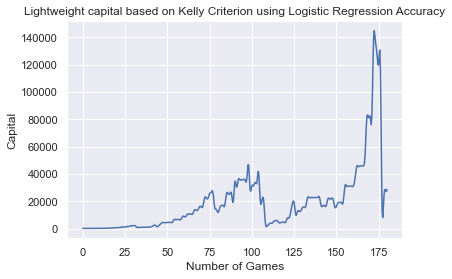

In [44]:
from scipy.interpolate import make_interp_spline
x_curve_plot = []
y_curve_plot = []



for i in range(0,lightweight_len + 1):
    x_curve_plot.append(i)
    y_curve_plot.append(run_simulation_pure_kelly_criterion_logistic(100)[0][i])
 
# Dataset
x = np.array(x_curve_plot)
y = np.array(y_curve_plot)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
for i in range(len(Y_)):
    if(Y_[i]<=0):
        Y_[i] = 0
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Lightweight capital based on Kelly Criterion using Logistic Regression Accuracy")
plt.xlabel("Number of Games")
plt.ylabel("Capital")
plt.show()

In [45]:
def findmaxindex(ylist):
    for i in ylist:
        if i==max(ylist):
            return  list(ylist).index(i)

In [46]:
findmaxindex(y)

172

### Preferred Choice of Model with Kelly Criterion and Take Profit/Stop Loss

Based on the end result of both model, we have decided to go ahead with the logistic regression model as our preferred model as it yields a higher return on the test dataset based on Kelly Criterion. We provided of take profit/stop loss as this option is a crucial part of investment/gambling.

In [47]:
def takeprofit(capital):
    while True:
        try:
            profit = int(input("Please enter take profit as a percentage of your capital(>= 0): "))
            if profit>=0:
                break
        except:
            print("Please enter an integer")
    return (profit/100 + 1)*capital

def stoploss(capital):
    while True:  
        try:
            Stoploss = int(input("Please enter stop loss as a percentage of your capital(<= 100%): "))
            if(Stoploss>=0):
                if(Stoploss/100 *capital) <= capital:
                    break
                else:
                    Stoploss = int(input("Please enter stop loss as a percentage of your capital(<= 100%): "))
            else:
                Stoploss = int(input("Please enter stop loss as a percentage of your capital(>=0%): "))
        except:
            print("Please enter an integer!")
    return (Stoploss/100 *capital)

In [48]:
I =  len(y_test)

def run_simulation_pure_kelly_criterion_logistic_modified(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    flag = 0
    profit = takeprofit(capital)
    stop_loss = stoploss(capital)
    
    for i in range(I): #Outer loop for the series simulations.
        red_proba = compare_prob_logistic.iloc[i]["Probability_Of_Red"]
        blue_proba = compare_prob_logistic.iloc[i]["Probability_Of_Blue"]
        red_deci_odds = compare_prob_logistic.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob_logistic.iloc[i]["Blue Decimal Odds"]
        prediction = compare_prob_logistic.iloc[i]["Predicted_Winner"]
        actual_outcome = compare_prob_logistic.iloc[i]["Winner"]
        if(c[0][i] >= profit):
            c[0][i+1] = c[0][i]
            continue
            
        if(c[0][i]<= stop_loss):
            c[0][i+1] = c[0][i]
            continue
            
        if flag==1 : 
            c[0,i+1] = 0
            continue
            
        elif c[0,i]<=0:
            c[0,i+1] = 0
            flag = 1
            continue
        
        if prediction=='Red':
            f = (red_proba) - (blue_proba)/red_deci_odds 
                
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
            
            
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * red_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
        else:
            f = blue_proba - red_proba/blue_deci_odds

            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
            

    return c


c_1 = run_simulation_pure_kelly_criterion_logistic_modified(100) #Runs the simulation.
print(c_1)#Looking at a simulation
print("\n")
print(f'Final Outcome: ${math.floor(c_1[0][-1])}')

Please enter take profit as a percentage of your capital(>= 0): 1000
Please enter stop loss as a percentage of your capital(<= 100%): 10
[[ 100.          100.          100.          100.          100.
   100.          107.3975      129.92734755  117.32027016  131.67405325
   131.67405325  131.67405325  200.24160472  200.24160472  200.24160472
   249.70208205  366.05925706  467.91670957  467.91670957  638.98331526
   739.17589909  739.17589909  739.17589909 1098.42277781 1098.42277781
  1098.42277781 1508.95829102 1508.95829102 1508.95829102 1508.95829102
  1508.95829102 1508.95829102 1508.95829102 1508.95829102 1508.95829102
  1508.95829102 1508.95829102 1508.95829102 1508.95829102 1508.95829102
  1508.95829102 1508.95829102 1508.95829102 1508.95829102 1508.95829102
  1508.95829102 1508.95829102 1508.95829102 1508.95829102 1508.95829102
  1508.95829102 1508.95829102 1508.95829102 1508.95829102 1508.95829102
  1508.95829102 1508.95829102 1508.95829102 1508.95829102 1508.95829102
  1508.

###  Key Takeaways

As seen from the graph of the capital without any stop loss/take profit option, we can see that the end outcome may not be the most profitable so the introduction of take profit/stop loss gives the user more flexibility on when to stop betting.



**Conclusion:**
Based on our analysis, logistic regression has a better accuracy score and yields higher profits than binary classification when used in Kelly Criterion Model.Kelly Criterion Model will increase our profits at the end if our machine learning model has a decently high accuracy. 

<br>

We would recommend a typical player to use our Kelly criterion formula as a guideline on the proportion of money to put in each games rather than random betting as seen from the difference in the amount of money left at the end.

<br>


For players with specific risk tolerance, they can use our modified model to achieve their goals. I.e High risk tolerance players can set a higher take profit and lower stop loss in hopes of winning more money, while low risk tolerance players can set a relatively lower take profit and a higher stop loss to minimise their losses. 

<br>


**Ultimately, the outcome depends on the risk aversion of the players.**
